<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_56_Ridge_Regression_Code/Lecture_56_ridge_regression_key_understandings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5 Key understanding**

**1.How the coefficients get affectd?**

**Penalty Term:**

Ridge Regression introduces a penalty term to the loss function, which is proportional to the square of the magnitude of the coefficients.

**Coefficient Shrinkage:**

This penalty encourages the model to reduce the size of the coefficients.

**Balancing Fit and Complexity:**

The model balances fitting the data well with keeping the coefficient magnitudes small to minimize the overall loss function.

**Regularization Strength (Alpha):**

The degree to which coefficients are shrunk is controlled by the regularization parameter (alpha). A higher alpha means a stronger penalty and more shrinkage.

**Reducing Overfitting:**

By shrinking the coefficients, Ridge Regression helps to reduce the complexity of the model and makes it less sensitive to the specific training data, which can help prevent overfitting [1]

In [45]:
# Import necessary libraries for data loading, manipulation, and plotting.

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [46]:
# Load the diabetes dataset, a commonly used dataset for regression tasks.

data = load_diabetes()

In [47]:
# Create a Pandas DataFrame from the dataset features and assign column names.

df = pd.DataFrame(data.data, columns=data.feature_names)


In [48]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [49]:
# Add the target variable (diabetes progression) to the DataFrame as a new column.

df['TARGET'] = data.target

In [50]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [51]:
df.shape

(442, 11)

In [52]:
# Import the train_test_split function to split the data into training and testing sets.

from sklearn.model_selection import train_test_split

# Split the data: 80% for training and 20% for testing, with a fixed random state for reproducibility.

X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, test_size=0.2, random_state=2)

In [53]:
# Import the Ridge regression model and the r2_score metric for evaluation.

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


In [54]:
# Initialize lists to store the coefficients and R2 scores for different alpha values.

coefs = []
r2_scores = []

# Iterate through a list of alpha values (regularization strengths).

for i in [0,10,100,1000]:

  # Create a Ridge regression model with the current alpha value.
  ridge = Ridge(alpha=i)

  # Fit the model to the training data.
  ridge.fit(X_train, y_train)

  # Store the coefficients of the trained model.
  coefs.append(ridge.coef_.tolist())

  # Make predictions on the test data.
  y_pred = ridge.predict(X_test)

  # Calculate and store the R2 score (coefficient of determination).
  r2_scores.append(r2_score(y_test, y_pred))

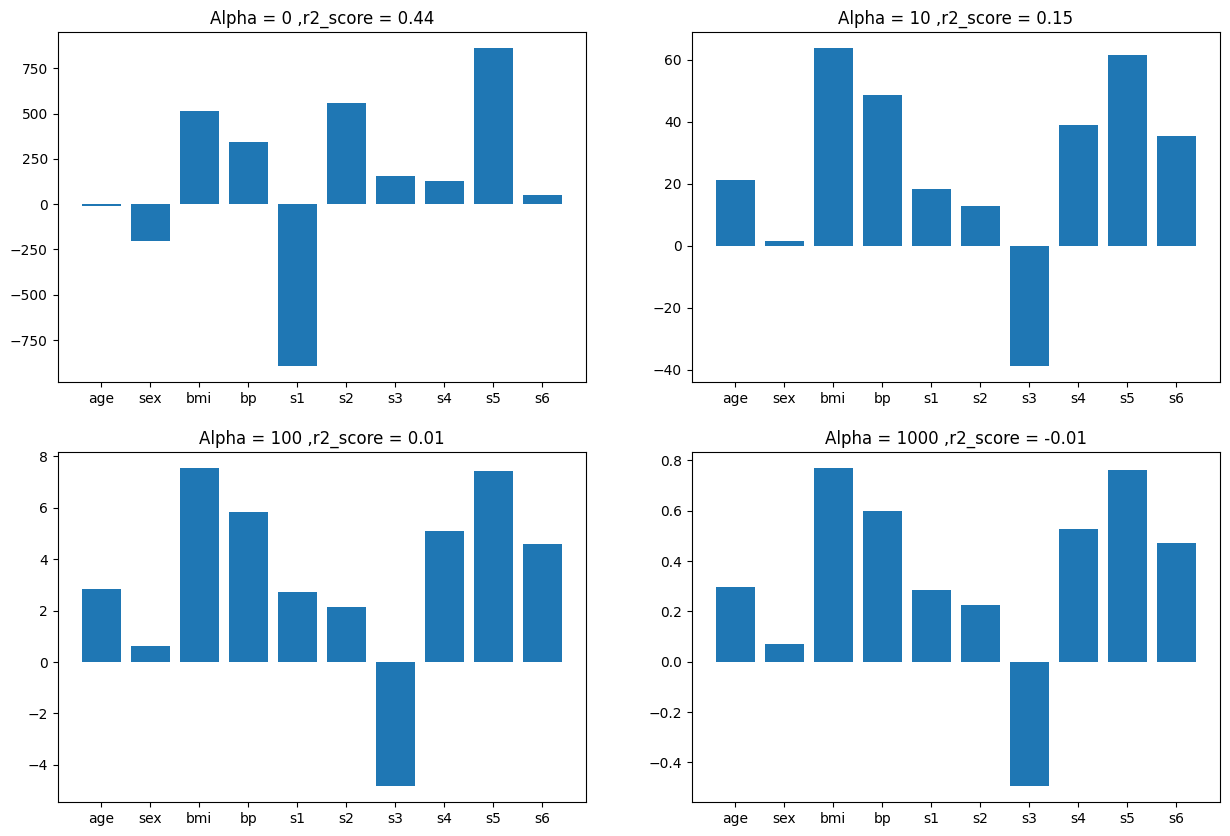

In [55]:
# Create a figure with multiple subplots to visualize the coefficients for different alpha values.
plt.figure(figsize=(15,10))

# Create the first subplot for alpha = 0 (equivalent to linear regression).
plt.subplot(221)

# Create a bar plot of the coefficients.
plt.bar(data.feature_names,coefs[0])

# Set the title of the subplot including the alpha value and R2 score.
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

# Create the second subplot for alpha = 10.

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

# Create the third subplot for alpha = 100.

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

# Create the fourth subplot for alpha = 1000.

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))
plt.show()

# **2.Higher Coefficients are affected more**

**Regularization Penalty:**

Ridge Regression adds a penalty term to the standard linear regression cost function. This penalty is proportional to the square of the coefficients (L2 regularization).

**Effect on Large Coefficients:**

Coefficients with larger absolute values contribute more to the penalty term (since they are squared).

**Minimizing the Cost Function:**

During training, the model tries to minimize the combined cost function (original loss + penalty). To minimize the penalty, it's more beneficial to reduce the magnitude of larger coefficients compared to smaller ones.

**Shrinking Effect:**

This pressure to minimize the penalty leads to a greater shrinking of the larger coefficients towards zero than the smaller ones.

**Relative Impact:**

Therefore, coefficients that were initially larger experience a more significant relative reduction in magnitude due to the regularization, demonstrating that higher coefficients are affected more

In [56]:
# Define a range of alpha values to explore.

alpha = [0,0.0001,0.001,0.01,0.1,1,10,100,1000]

# Initialize a list to store coefficients for each alpha

coefs = []

# Iterate through the alpha values.

for i in alpha:
  ridge = Ridge(alpha=i)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_.tolist())

In [57]:
# Convert the list of coefficients into a NumPy array.

input_array = np.array(coefs)

In [58]:
# Create a Pandas DataFrame from the coefficients, with feature names as columns.

coef_df = pd.DataFrame(input_array, columns=data.feature_names)

coef_df['alpha'] = alpha
coef_df.set_index('alpha')
# coef_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [59]:
# Define a refined range of alpha values for a more detailed plot.

alpha = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alpha:
  ridge = Ridge(alpha=i)
  ridge.fit(X_train, y_train)
  coefs.append(ridge.coef_.tolist())

In [60]:
# Convert the list of coefficients to a NumPy array and transpose it.

input_array = np.array(coefs).T

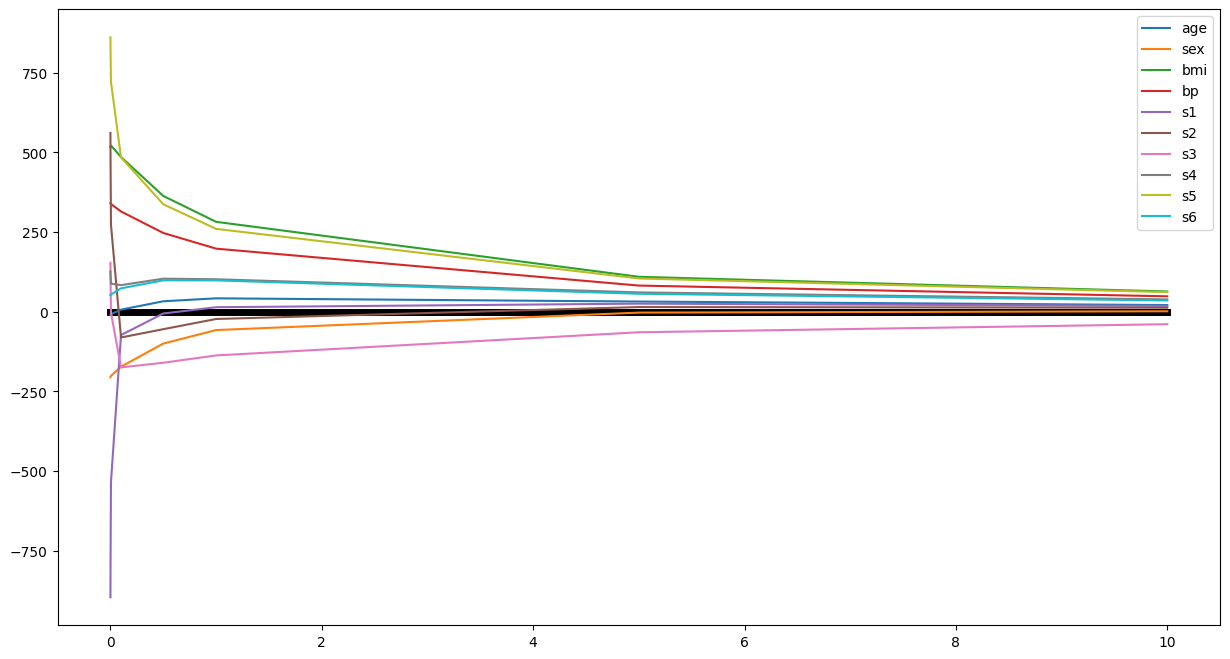

In [61]:
# Create a figure for plotting coefficient paths.

plt.figure(figsize=(15,8))

# Plot a horizontal line at y=0 for reference.

plt.plot(alpha, np.zeros(len(alpha)), color='black',linewidth=5)

# Iterate through each feature's coefficients.

for i in range(input_array.shape[0]):

   # Plot the coefficient values against alpha.

  plt.plot(alpha, input_array[i], label=data.feature_names[i])
  plt.legend()
plt.show()

# **3.Bias Variance Tradeoff**

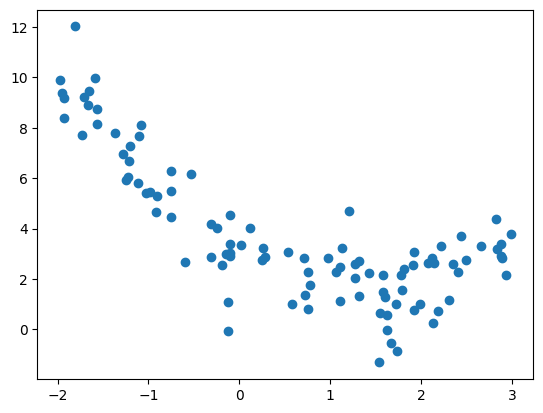

In [62]:
# Generate synthetic data with a non-linear relationship and added noise to demonstrate bias-variance tradeoff.

m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

In [63]:
# Split the synthetic data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1),y.reshape(100), test_size=0.2, random_state=2)



In [64]:
# Import PolynomialFeatures to create polynomial features.

from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features of degree 10.

poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [65]:
# Import bias_variance_decomp to analyze bias, variance, and expected loss.

from mlxtend.evaluate import bias_variance_decomp

# Define a range of alpha values.

alpha = np.linspace(0,30,100)

# Initialize lists to store loss, bias, and variance.

loss = []
bias = []
variance = []


for i in alpha:
  # Create a Ridge model with the current alpha.
  reg = Ridge(alpha=i)

  # Decompose the mean squared error into bias, variance, and irreducible error.
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg, X_train, y_train, X_test, y_test, loss='mse', random_seed=123)

   # Append the calculated values to their respective lists.
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)

#


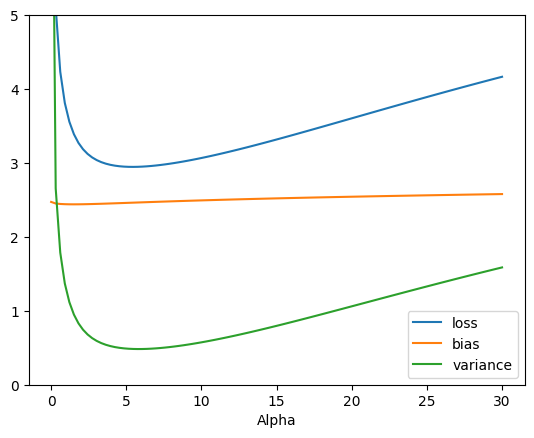

In [66]:
# Plot the loss, bias, and variance against alpha.

plt.plot(alpha, loss, label='loss')
plt.plot(alpha, bias, label='bias')
plt.plot(alpha, variance, label='variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()
plt.show()

# **4.Effect of Regularization on loss Function**

**Augmented Loss Function:**

Regularization adds a penalty term to the standard loss function (like Mean Squared Error for regression). This new, augmented loss function is what the model now aims to minimize.

**Balancing Fit and Complexity:**

The regularization term penalizes large coefficient values. By minimizing the augmented loss, the model must find a balance between fitting the training data well (minimizing the original loss) and keeping the coefficients small (minimizing the regularization penalty).

**Controlling the Penalty Strength:**

The regularization parameter (alpha in your code) controls the strength of the penalty. A higher alpha means a larger penalty for larger coefficients, forcing the model to shrink coefficients more aggressively towards zero.

**Reshaping the Loss Landscape:**

The addition of the penalty term changes the shape of the loss function landscape. This can help to create a more well-behaved optimization problem, potentially leading to better convergence and avoiding getting stuck in local minima.

**Preventing Overfitting:**

By penalizing large coefficients, regularization discourages overly complex models that fit the training data perfectly but generalize poorly to new data. This shrinkage effect helps to reduce variance and improve the model's ability to make predictions on unseen examples.

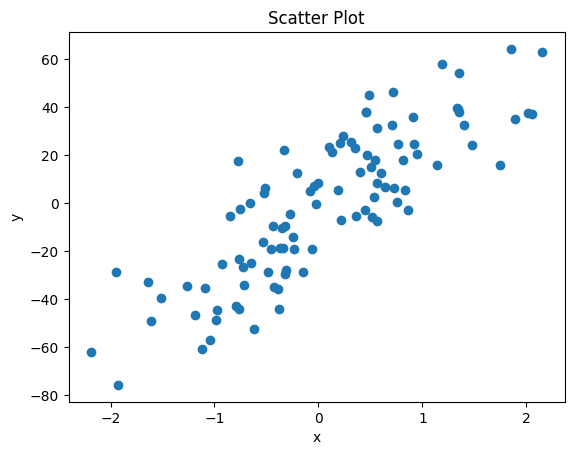

In [67]:
# Generate synthetic data for a simple linear regression example.

from sklearn.datasets import make_regression
x,y = make_regression(n_samples=100, n_informative=1,n_targets=1, n_features=1, noise=20,random_state=13)

plt.title('Scatter Plot')

# Create a scatter plot of the generated data.

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [68]:
# Import the LinearRegression model.

from sklearn.linear_model import LinearRegression

# Create a LinearRegression model.

reg = LinearRegression()

# Print the coefficient of the fitted model.

reg.fit(x,y)

print(reg.coef_)

print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [69]:
# Define a function to calculate the regularized loss for a given slope (m) and alpha.

def cal_loss(m,alpha):
  return np.sum((y - m*x.ravel() + 2.29)**2) + alpha*m*m

In [70]:
# Define a function to make predictions with a given slope (m) (assuming a fixed intercept).

def predict(m):
  return m*x - 2.29

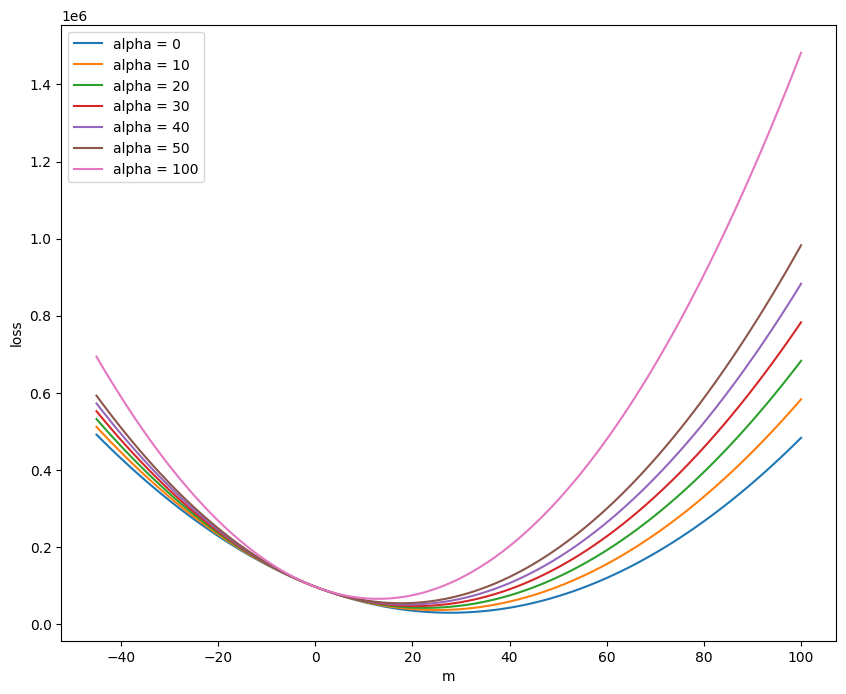

In [71]:
# Define a range of possible slope values (m).
m = np.linspace(-45,100,100)
plt.figure(figsize=(10,8))

for j in [0,10,20,30,40,50,100]:

  loss = []

  # Calculate the loss for each slope value in the range.
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)

    # Plot the loss function for the current alpha
  plt.plot(m,loss,label='alpha = {}'.format(j)) # alpha and lamda is same term
plt.legend()
plt.xlabel('m')
plt.ylabel('loss')
plt.show()